## Exploratory Data Analysis

In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
from path import Path


In [4]:
#load data
data = Path('../Resources/cleaned_stroke_dataset.csv')
stroke_df = pd.read_csv(data)
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3,0,0,No,children,Rural,95.12,18.0,unknown,0
1,Male,58,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8,0,0,No,Private,Urban,110.89,17.6,unknown,0
3,Female,70,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14,0,0,No,Never_worked,Rural,161.28,19.1,unknown,0


In [5]:
stroke_df['gender'].value_counts()

Female    25665
Male      17724
Other        11
Name: gender, dtype: int64

In [7]:
stroke_df['hypertension'].value_counts()

0    39339
1     4061
Name: hypertension, dtype: int64

In [15]:
stroke_df['smoking_status'].value_counts()

never smoked       16053
unknown            13292
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

In [8]:
stroke_df['heart_disease'].value_counts()

0    41338
1     2062
Name: heart_disease, dtype: int64

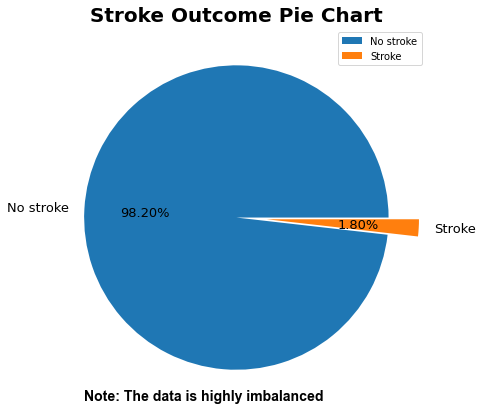

In [9]:
# plotting the output (stroke) column in a pie chart
sizes = stroke_df['stroke'].value_counts(sort = True)
plt.figure(figsize=(7,7),facecolor='white')

plt.pie(sizes, labels=['No stroke','Stroke'], autopct='%1.2f%%', explode=[0, 0.2],textprops={'fontsize': 13})
plt.title("Stroke Outcome Pie Chart", fontdict={'fontsize': 20,'weight':'bold'})
plt.text(-1,-1.2, "Note: The data is highly imbalanced ", {'font':'Arial', 'size':14, 'color':'black', 'weight':'bold'})
plt.legend()
plt.show()

#### Review attributes: age, gender, marital status, type of work and residence, hypertension, heart disease, average glucose level measured after a meal, Body Mass Index (BMI), and smoking status

## Gender attribute

<AxesSubplot:xlabel='gender', ylabel='count'>

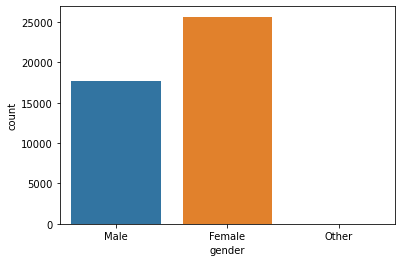

In [10]:
# gender count
sns.countplot(data=stroke_df, x='gender')

In [11]:
print(stroke_df['gender'].value_counts())

Female    25665
Male      17724
Other        11
Name: gender, dtype: int64


In [15]:
# view the distribution between stroke and gender 
len_data = len(stroke_df)
len_w = len(stroke_df[stroke_df["gender"]=="Male"])
len_m = len_data - len_w
len_o = len_data - (len_w + len_m)

men_stroke = len(stroke_df.loc[(stroke_df["stroke"]==1)&(stroke_df['gender']=="Male")])
men_no_stroke = len_m - men_stroke

women_stroke = len(stroke_df.loc[(stroke_df["stroke"]==1) & (stroke_df['gender']=="Female")])
women_no_stroke = len_w - women_stroke

other_stroke = len(stroke_df.loc[(stroke_df["stroke"]==1) & (stroke_df['gender']=="Other")])
other_no_stroke = len_o - other_stroke

labels = ['Men with stroke','Men healthy','Women with stroke','Women healthy']
values = [men_stroke, men_no_stroke, women_stroke, women_no_stroke]

fig = go.Figure(data=[go.Pie(labels=labels, values=values,textinfo='label+percent',hole=0.4)])
fig.update_layout(
    title_text="Distribution of stroke event according to their gender")
fig.show()

## Marriage attribute

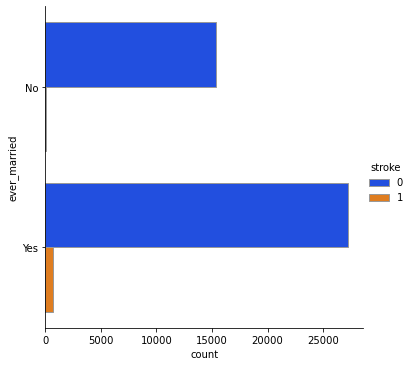

In [16]:
# marriage and stroke
sns.catplot(y="ever_married", hue="stroke", kind="count",
            palette="bright", edgecolor=".6",
            data=stroke_df)

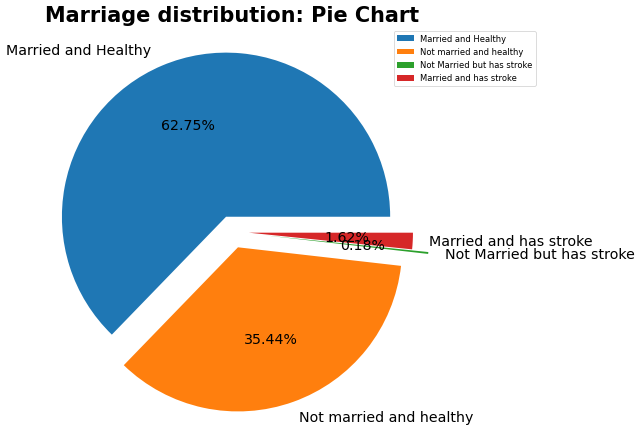

In [37]:
plt.figure(figsize = (30,10), dpi = 60)
plt.subplot(1,3,(1,1))
stroke_married = len(stroke_df.loc[(stroke_df["stroke"]==1)&(stroke_df['ever_married']=="Yes")])
stroke_not_married = len(stroke_df.loc[(stroke_df["stroke"]==1)&(stroke_df['ever_married']=="No")])
healthy_married = len(stroke_df.loc[(stroke_df["stroke"]==0)&(stroke_df['ever_married']=="Yes")])
healthy_not_married = len(stroke_df.loc[(stroke_df["stroke"]==0)&(stroke_df['ever_married']=="No")])
temp=pd.Series([healthy_married,healthy_not_married,stroke_not_married,stroke_married],
               index=['Married and Healthy ','Not married and healthy','Not Married but has stroke','Married and has stroke'])
plt.pie(temp,labels=['Married and Healthy ','Not married and healthy','Not Married but has stroke','Married and has stroke'], explode=[0.1, 0.1,0.2,0.1], autopct='%1.2f%%',textprops={'fontsize': 17})
plt.title("Marriage distribution: Pie Chart", fontdict={'fontsize': 25,'weight':'bold'})
plt.legend( bbox_to_anchor=(0.75, 0.5, 0.5, 0.5))


## Work type attribute

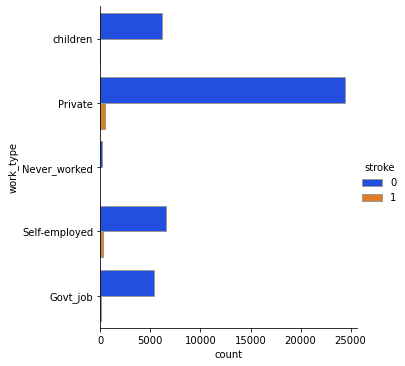

In [8]:
# Compare work_type with stroke 
sns.catplot(y="work_type", hue="stroke", kind="count",
            palette="bright", edgecolor=".6",
            data=stroke_df)

In [9]:
print(stroke_df['work_type'].value_counts())

Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: work_type, dtype: int64


## Residence type attribute

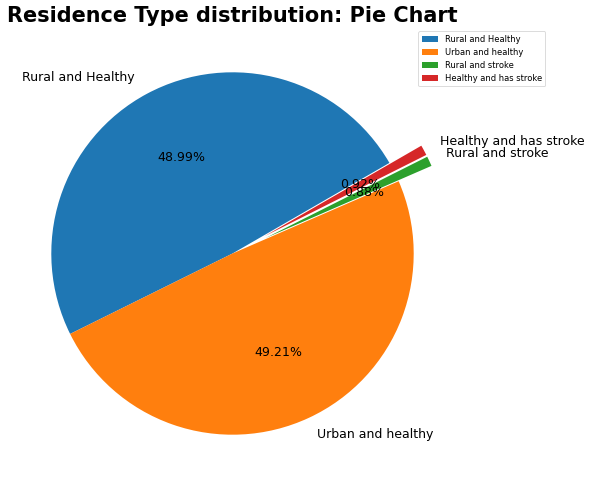

In [11]:
plt.figure(figsize = (30,10), dpi = 60)
plt.subplot(1,3,(1,2))

stroke_urban = len(stroke_df.loc[(stroke_df["stroke"]==1)&(stroke_df['Residence_type']=="Urban")])
stroke_rural = len(stroke_df.loc[(stroke_df["stroke"]==1)&(stroke_df['Residence_type']=="Rural")])
healthy_urban = len(stroke_df.loc[(stroke_df["stroke"]==0)&(stroke_df['Residence_type']=="Urban")])
healthy_rural = len(stroke_df.loc[(stroke_df["stroke"]==0)&(stroke_df['Residence_type']=="Rural")])
temp=pd.Series([healthy_rural,healthy_urban,stroke_rural,stroke_urban],
               index=['Rural and Healthy ','Urban and healthy','Rural and stroke','Healthy and has stroke'])
plt.pie(temp,labels=['Rural and Healthy ','Urban and healthy','Rural and stroke','Healthy and has stroke']
        ,explode=[0.0, 0.0,0.2,0.2], autopct='%1.2f%%',textprops={'fontsize': 15},startangle=30)

plt.title("Residence Type distribution: Pie Chart", fontdict={'fontsize': 25,'weight':'bold'})
plt.legend( bbox_to_anchor=(0.7, 0.5, 0.5, 0.5))

## Hypertension attribute

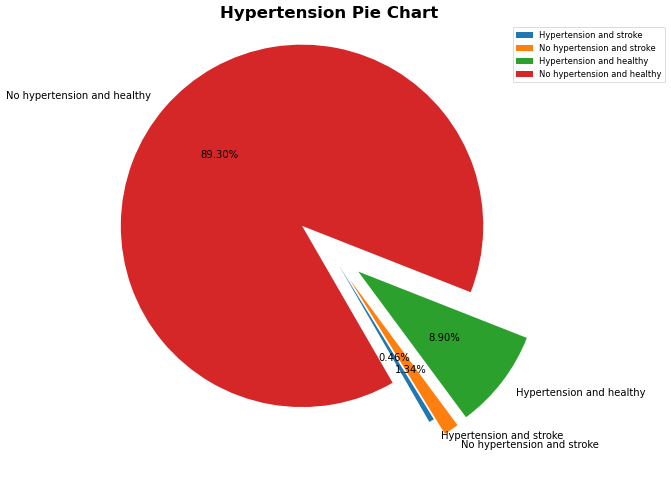

In [10]:
plt.figure(figsize = (30,10), dpi = 60)
plt.subplot(1,3,(1,2))

stroke_hypertension = len(stroke_df.loc[(stroke_df["stroke"]==1)&(stroke_df['hypertension']==1)])
stroke_no_hypertension = len(stroke_df.loc[(stroke_df["stroke"]==1)&(stroke_df['hypertension']==0)])
healthy_hypertension = len(stroke_df.loc[(stroke_df["stroke"]==0)&(stroke_df['hypertension']==1)])
healthy_no_hypertension = len(stroke_df.loc[(stroke_df["stroke"]==0)&(stroke_df['hypertension']==0)])
temp=pd.Series([stroke_hypertension,stroke_no_hypertension,healthy_hypertension,healthy_no_hypertension],
               index=['Hypertension and stroke ','No hypertension and stroke','Hypertension and healthy','No hypertension and healthy'])
plt.pie(temp,labels=['Hypertension and stroke ','No hypertension and stroke','Hypertension and healthy','No hypertension and healthy']
        ,explode=[0.1,0.2,0.2,0.2], autopct='%1.2f%%',textprops={'fontsize': 12},startangle=-60)

plt.title("Hypertension Pie Chart", fontdict={'fontsize': 20,'weight':'bold'})
plt.legend( bbox_to_anchor=(0.75, 0.5, 0.5, 0.5))

### Bi/Multivariate 

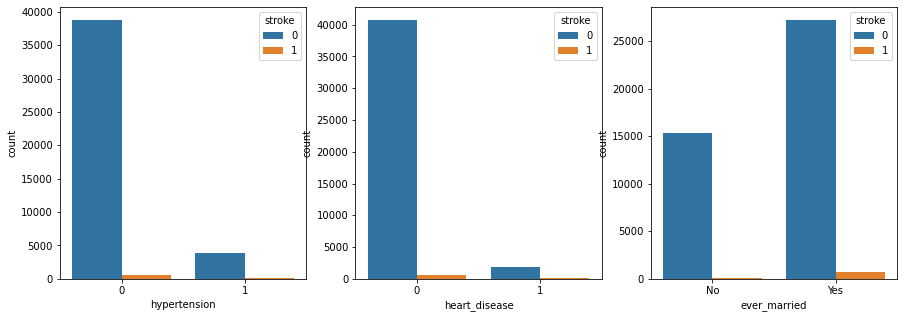

In [23]:
# charts on hyptertension, heart disease, and bmi
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
sns.countplot(data=stroke_df, x='hypertension', hue='stroke', ax=ax[0]);
sns.countplot(data=stroke_df, x='heart_disease', hue='stroke', ax=ax[1]);
sns.countplot(data=stroke_df, x='ever_married', hue='stroke', ax=ax[2]);

''

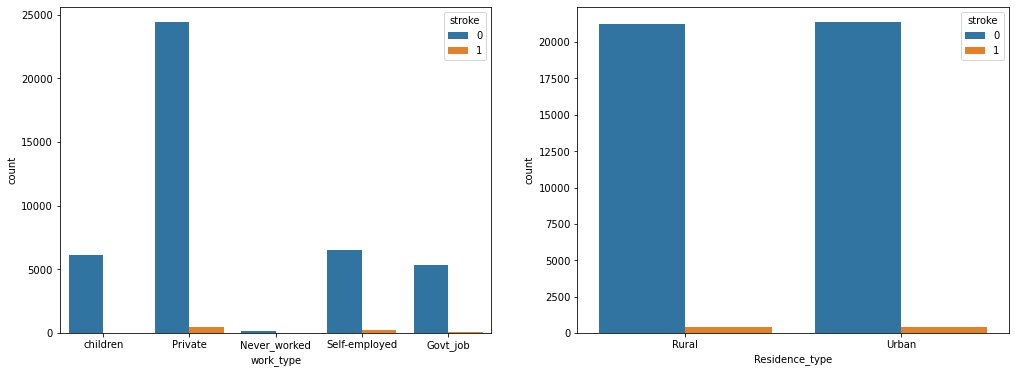

In [20]:
# work type, residence type, marital status
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(17, 6))
sns.countplot(data=stroke_df, x='work_type', hue='stroke', ax=ax[0]);
sns.countplot(data=stroke_df, x='Residence_type', hue='stroke', ax=ax[1]);

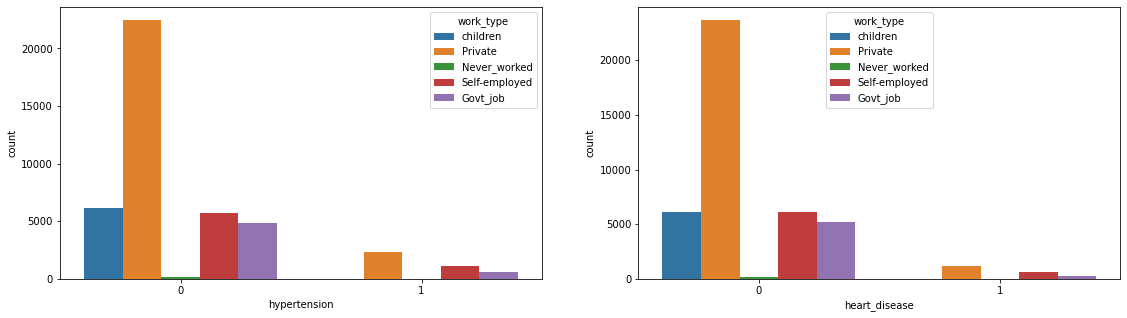

In [18]:
# heart disease and hypertension between stroke
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(19, 5))
sns.countplot(data=stroke_df, x='hypertension', hue='work_type', ax=ax[0]);
sns.countplot(data=stroke_df, x='heart_disease', hue='work_type', ax=ax[1]);

#### A significant number of people who have heart disease or are suffering from hypertension work in private sector.

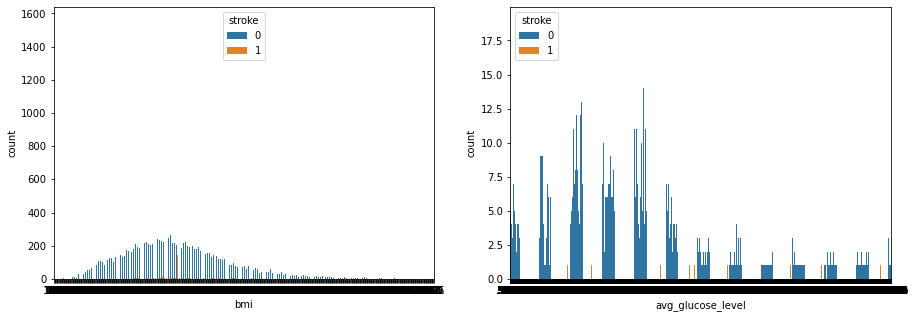

In [29]:
# examining bmi and average glucose level to stroke outcome
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.countplot(data=stroke_df, x='bmi', hue='stroke', ax=ax[0]);
sns.countplot(data=stroke_df, x='avg_glucose_level', hue='stroke', ax=ax[1]); 

### Stacked bar charts

In [83]:
# divide data into bins
stroke_df['age_binned'] = pd.cut(stroke_df['age'], np.arange(0, 91, 5))
stroke_df['bmi_binned'] = pd.cut(stroke_df['bmi'], np.arange(0, 101, 5))
stroke_df['avg_glucose_level_binned'] = pd.cut(stroke_df['avg_glucose_level'], np.arange(0, 301, 10))


In [84]:
def get_stacked_bar_chart(column):
    # Get the count of records by column and stroke    
    stroke_stack = stroke_df.groupby([column, 'stroke'])['age'].count()
    # Create proper DataFrame's format
    stroke_stack = stroke_stack.unstack()    
    return stroke_stack.plot.bar(stacked=True, figsize=(6,6), width=1);

<AxesSubplot:xlabel='age_binned'>

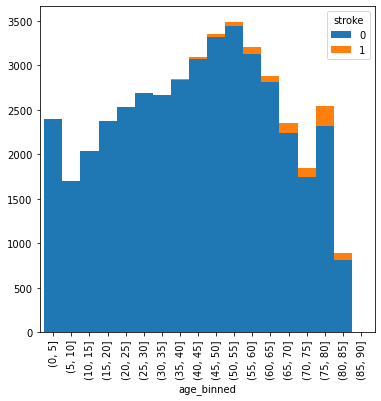

In [85]:
#age and stroke
get_stacked_bar_chart('age_binned')

<AxesSubplot:xlabel='bmi_binned'>

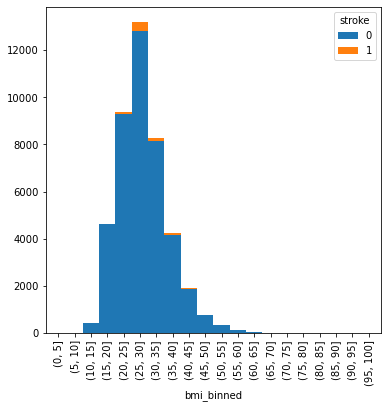

In [88]:
# bmi and stroke
get_stacked_bar_chart('bmi_binned')


<AxesSubplot:xlabel='avg_glucose_level_binned'>

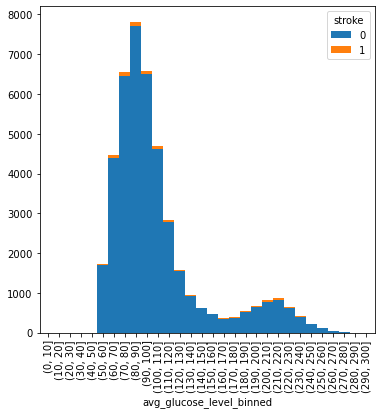

In [89]:
#stroke and average glucose level
get_stacked_bar_chart('avg_glucose_level_binned')